In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10):my_arr = my_arr*2

CPU times: user 5.72 ms, sys: 5.54 ms, total: 11.3 ms
Wall time: 10.4 ms


In [4]:
%time for _ in range(10):my_list = [x*2 for x in my_list]

CPU times: user 417 ms, sys: 66 ms, total: 483 ms
Wall time: 483 ms


1. Whenever you see "array", "Numpy array", "ndarray", in the text, with few exceptions they all refer to the same thing: __the ndarray object.__

# Arithmetic with NumPy Arrays
- Arithmetic operations with scalars propagate the scalar argument to each element in the array, such as `* + - / **` `><=`.

In [16]:
arr = np.array([[1,2,3],[4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [7]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [8]:
arr>2

array([[False, False,  True],
       [ True,  True,  True]])

2. If you change values in a slice, the original data will be changed also, which is different from built-in list in Python. If you want a "copy" of the ndarray, use `.copy()` explicitly.

- Note the dimentions of the slice:
__Nothe the colon itself take the entile axis. So if you want a slice with higher dimention, don't pass a single colon to slice. Shit happens when slicing to a "vector"!__
![Figure 4-2(from the book)](https://pic.imgdb.cn/item/63031b1016f2c2beb1d8dc05.jpg)

In [9]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)

In [10]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [11]:
data

array([[-0.70785322, -0.73378579,  2.80666951, -1.55720321],
       [-1.69120972,  0.83691689, -1.06738982, -1.08504116],
       [ 0.69818248,  0.7362491 , -0.73447254,  0.61330839],
       [-0.9661357 , -0.09093103,  1.65055547, -0.10387157],
       [-1.0413339 ,  0.07222072, -0.72012347,  0.44347172],
       [ 0.34730861,  0.13612762, -0.77909112,  0.31603718],
       [-0.69166991,  1.68680442,  0.05962128, -1.02441701]])

In [12]:
names=='Bob'

array([ True, False, False,  True, False, False, False])

In [17]:
data[names=='Bob']=0

- Selecting data from an array by boolean indexing always creats a copy of the data, even if the returned array is unchanged.

In [18]:
data

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.69120972,  0.83691689, -1.06738982, -1.08504116],
       [ 0.69818248,  0.7362491 , -0.73447254,  0.61330839],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.0413339 ,  0.07222072, -0.72012347,  0.44347172],
       [ 0.34730861,  0.13612762, -0.77909112,  0.31603718],
       [-0.69166991,  1.68680442,  0.05962128, -1.02441701]])

In [20]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [22]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

3. Universal Functions are functions that performs __element-wise operations__ on data in ndarrays.

In [23]:
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points,points)

In [24]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [25]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [26]:
z = np.sqrt(xs**2+ys**2)

In [27]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

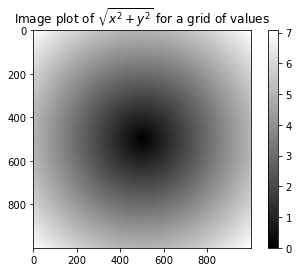

In [29]:
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()
plt.title('Image plot of $\sqrt{x^2+y^2}$ for a grid of values')

4. `np.where(condi,xarr-true,yarr-false)` choose from `xarr-true` when condi, else from `yarr-false`. Note the `xarr-true` and `yarr-false` can be scalars or ndarray.

# Linear Algebra

Multiplying two two-dimentional arrays with `*` is an element-wise product instead of a matrix dot product. Thus we need some functions to do linear algebra in Numpy.

- Matrix multiply:`x@y`,`np.dot(x,y)`,`x.dot(y)`
- For other linear algebra computations, find them in a sub-library. `from numpy.linalg import`

In [30]:
x = np.arange(1,7).reshape((2,3))
x

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
y = np.array([6,23,-1,7,8,9]).reshape((3,2))
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [32]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [33]:
np.dot(x,y)

array([[ 28,  64],
       [ 67, 181]])

In [34]:
x@y

array([[ 28,  64],
       [ 67, 181]])

In [36]:
from numpy.linalg import inv,qr
X = np.random.randn(5,5)
X

array([[ 1.57332115,  1.06869951,  1.41095559, -1.14533941,  0.6075189 ],
       [ 0.1882541 ,  0.14654617, -0.79156641, -0.68212775, -0.46053858],
       [ 1.28055164,  0.07593075,  1.33190304, -0.40132665, -1.53359355],
       [ 1.18648757, -0.71242041,  1.27815184,  0.43629435, -0.31709894],
       [ 1.32760051,  0.57256056,  0.29860125, -0.09398968,  0.65856952]])

In [38]:
mat = X.T.dot(X)
mat

array([[ 7.32086742,  1.72108242,  5.6893757 , -2.05144249, -0.59663841],
       [ 1.72108242,  2.00472833,  0.75340474, -1.71909969,  1.06829677],
       [ 5.6893757 ,  0.75340474,  6.11417358, -1.08101682, -1.02951976],
       [-2.05144249, -1.71909969, -1.08101682,  2.13735053,  0.03355554],
       [-0.59663841,  1.06829677, -1.02951976,  0.03355554,  3.46734972]])

In [39]:
inv(mat)

array([[ 0.70449715, -0.19948008, -0.59191429,  0.21628528,  0.00484201],
       [-0.19948008,  3.78622725,  0.02339385,  2.88486553, -1.22184116],
       [-0.59191429,  0.02339385,  0.69259105, -0.20055915,  0.09852357],
       [ 0.21628528,  2.88486553, -0.20055915,  2.90910624, -0.93931819],
       [ 0.00484201, -1.22184116,  0.09852357, -0.93931819,  0.70403316]])

In [41]:
mat.dot(inv(mat)).round(1)

array([[ 1., -0.,  0.,  0., -0.],
       [-0.,  1.,  0., -0.,  0.],
       [-0., -0.,  1.,  0., -0.],
       [ 0., -0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  0.,  1.]])

In [52]:
nwalks = 20
nsteps = 1000

draws = np.random.randint(-1,2,size=(nwalks,nsteps))
walks = draws.cumsum(1)

walks

array([[ -1,   0,   0, ...,  28,  27,  26],
       [ -1,  -1,  -1, ...,  -2,  -1,  -1],
       [ -1,  -1,   0, ...,  -1,  -2,  -3],
       ...,
       [  0,  -1,   0, ...,  -8,  -9,  -9],
       [ -1,  -1,  -2, ..., -22, -22, -21],
       [  0,  -1,  -2, ...,  10,  11,  11]])

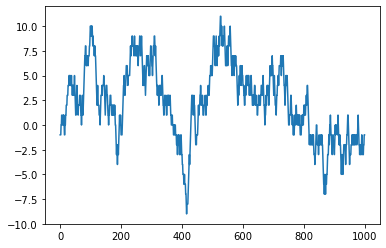

In [55]:
plt.plot(walks[1])